In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [15]:
df_en=pd.read_csv('all_communities_infomap.csv',sep=";")
df_en=df_en[df_en['Year']==2024]
df_en['Community ID']=df_en.apply(lambda row: 'Other' if row['Size']<50 else row['Community ID'], axis=1)

df_de=pd.read_csv('all_communities_infomap_de.csv',sep=";")
df_de=df_de[df_de['Year']==2024]
df_de['Community ID']=df_de.apply(lambda row: 'Other' if row['Size']<50 else row['Community ID'], axis=1)

df_fr=pd.read_csv('all_communities_infomap_fr.csv',sep=";")
df_fr=df_fr[df_fr['Year']==2024]
df_fr['Community ID']=df_fr.apply(lambda row: 'Other' if row['Size']<50 else row['Community ID'], axis=1)

df_es=pd.read_csv('all_communities_infomap_es.csv',sep=";")
df_es=df_es[df_es['Year']==2024]
df_es['Community ID']=df_es.apply(lambda row: 'Other' if row['Size']<50 else row['Community ID'], axis=1)


In [16]:
df_de['Members']=df_de['Members'].apply(lambda x: x.split(', '))
df_de=df_de.explode('Members')
df_de.rename(columns = {'Members':'Name'}, inplace = True)

df_en['Members']=df_en['Members'].apply(lambda x: x.split(', '))
df_en=df_en.explode('Members')
df_en.rename(columns = {'Members':'Name'}, inplace = True)

df_es['Members']=df_es['Members'].apply(lambda x: x.split(', '))
df_es=df_es.explode('Members')
df_es.rename(columns = {'Members':'Name'}, inplace = True)

df_fr['Members']=df_fr['Members'].apply(lambda x: x.split(', '))
df_fr=df_fr.explode('Members')
df_fr.rename(columns = {'Members':'Name'}, inplace = True)


In [17]:
df_en=df_en[['Name','Community ID']]
df_de=df_de[['Name','Community ID']]
df_fr=df_fr[['Name','Community ID']]
df_es=df_es[['Name','Community ID']]


In [18]:
df_en.rename(columns = {'Community ID':'Community ID_EN'}, inplace = True)
df_de.rename(columns = {'Community ID':'Community ID_DE'}, inplace = True)
df_fr.rename(columns = {'Community ID':'Community ID_FR'}, inplace = True)
df_es.rename(columns = {'Community ID':'Community ID_ES'}, inplace = True)

df=df_en.merge(df_de, on='Name', how='outer')
df=df.merge(df_fr, on='Name', how='outer')
df=df.merge(df_es, on='Name', how='outer')

In [20]:
df['Community ID_EN']=df['Community ID_EN'].fillna('Not in data')
df['Community ID_DE']=df['Community ID_DE'].fillna('Not in data')
df['Community ID_FR']=df['Community ID_FR'].fillna('Not in data')
df['Community ID_ES']=df['Community ID_ES'].fillna('Not in data')
df=df[df['Community ID_EN']!='Not in data']


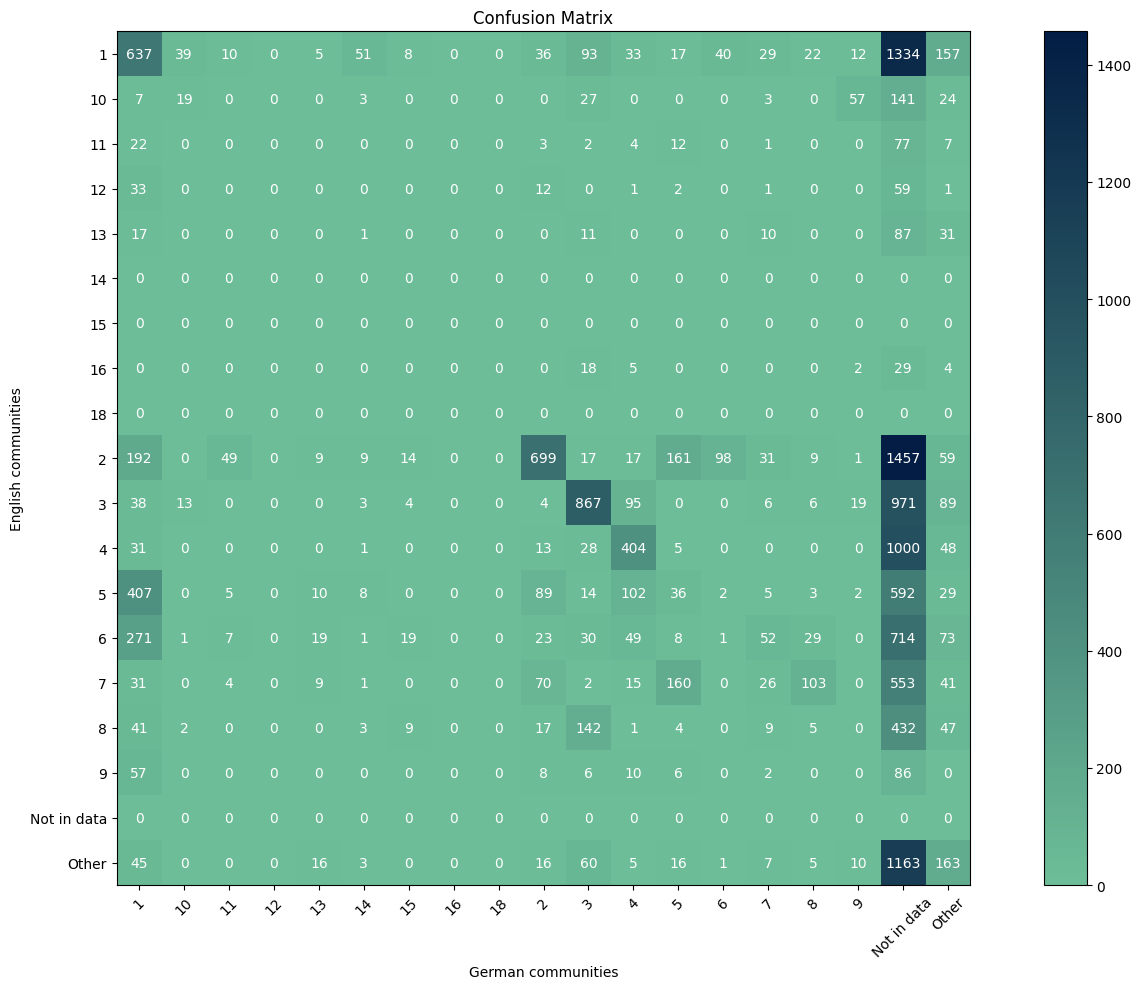

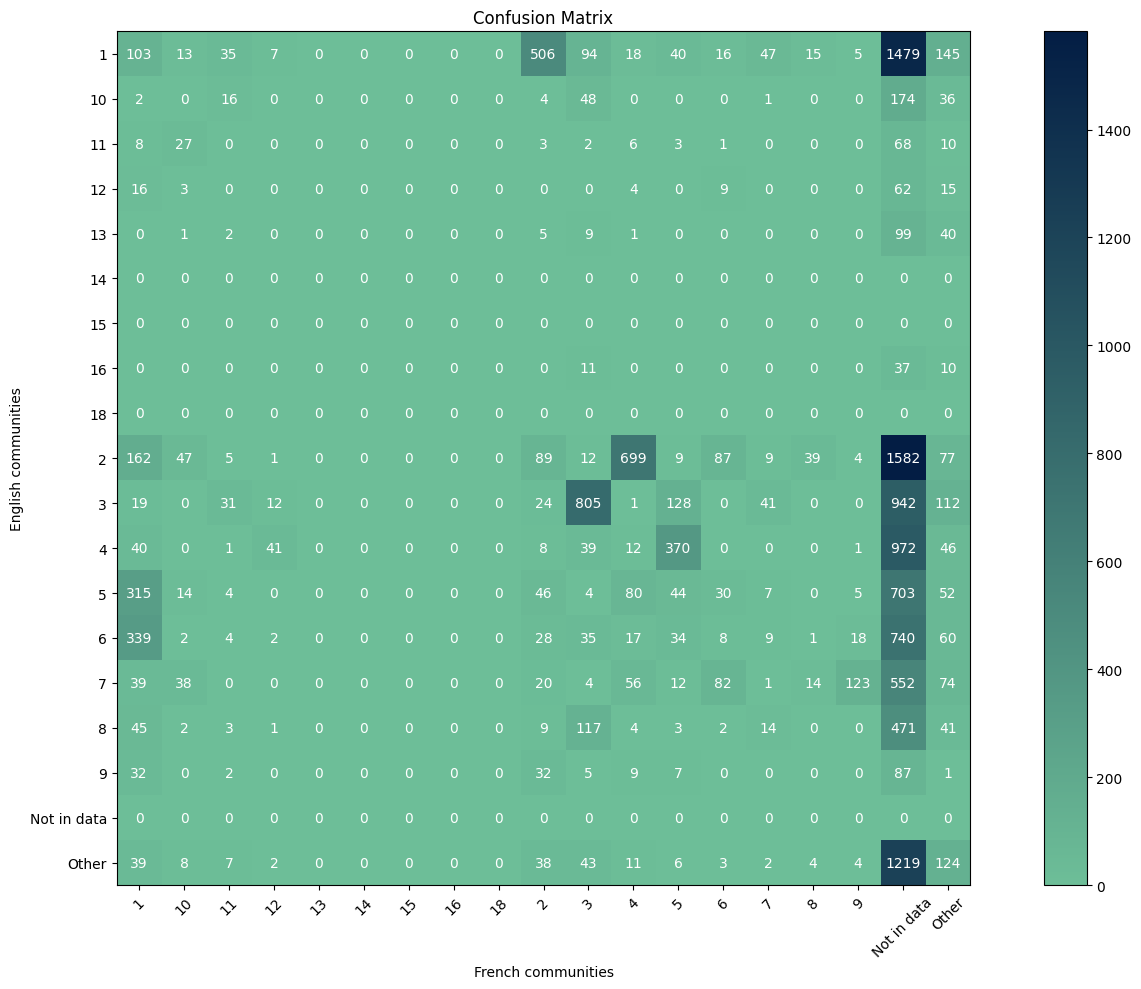

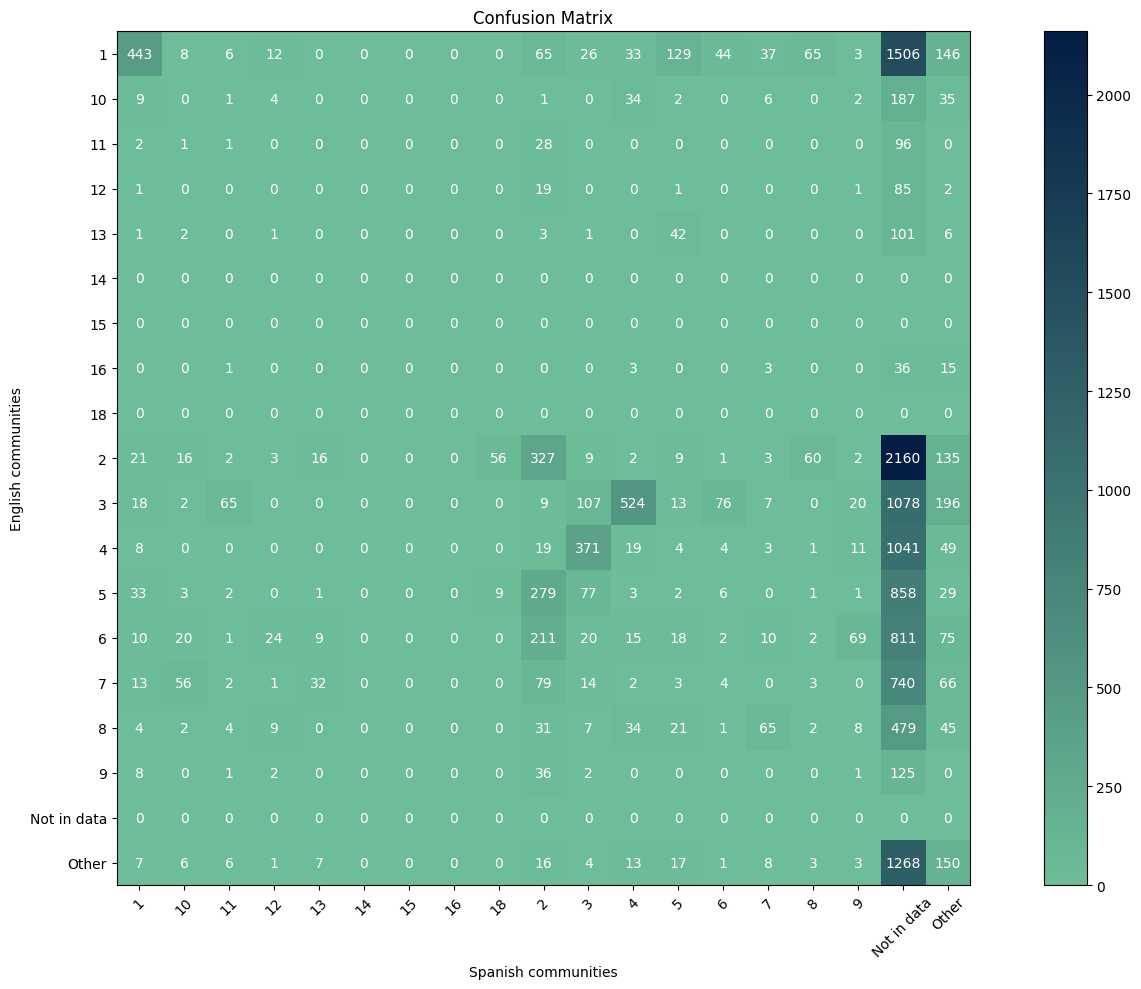

In [21]:
en_labels = df["Community ID_EN"].astype(str)
de_labels = df["Community ID_DE"].astype(str)
fr_labels = df["Community ID_FR"].astype(str)
es_labels = df["Community ID_ES"].astype(str)

combined=set(en_labels.unique()).union(set(de_labels.unique()))
combined=set(combined).union(set(fr_labels.unique()))
combined=set(combined).union(set(es_labels.unique()))
combined=list(combined)

cm1 = confusion_matrix(en_labels, de_labels, labels=sorted(combined))
cm2= confusion_matrix(en_labels, fr_labels, labels=sorted(combined))
cm3= confusion_matrix(en_labels, es_labels, labels=sorted(combined))

x=['English','English','English']
y=['German','French','Spanish']

colors = ['#6DBE98', '#031D44']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=sorted(combined))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=sorted(combined))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=sorted(combined))

disps=[disp1,disp2,disp3]

for i in range(3):
    fig, ax = plt.subplots(figsize=(15, 10))  
    disps[i].plot(cmap=custom_cmap, ax=ax, colorbar=True)

    for text in ax.texts: 
        text.set_color("white")

    plt.xticks(rotation=45) 
    plt.xlabel(y[i]+" communities")  
    plt.ylabel(x[i]+" communities")  
    plt.title("Confusion Matrix") 

    plt.tight_layout()

    plt.show()
